# Exploring data with Seaborn plots

In this assignment, we will analyze two datasets. First, we will explore [World Happiness Report 2019](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019), which is a landmark survey to determine the global happiness ranking of 156 countries by their own citizens. The report uses six factors(social support, freedom, corruption, generosity, GDP per capital, and health life expectancy) to evaluate a happy life. <br>
The dataset contains the following columns: <br>

1. __Country__: name of the country (categorical)<br>
2. __Ladder__: Cantril Ladder is a measure of life satisfaction (numeric)<br>
3. __SD of Ladder__: Standard deviation of the ladder (numeric)<br>
4. __Positive Affect__: Measure of positive emotion (numeric)<br>
5. __Negative Affect__: Measure of negative emotion (numeric)<br>
6. __Social Support__: Social Support contributed to the calculation of the Happiness Score (continuous)<br>
7. __Freedom__: Freedom contribution to the calculation of the Happiness Score (continuous)<br>
8. __Corruption__: Corruption contribution to the calculation of the Happiness Score (continuous)<br>
9. __Generosity__: Generosity contribution to the calculation of the Happiness Score (continuous)<br>
10. __Log of GDP per capita__: GDP contribution to the calculation of the Happiness Score (continuous)<br>
11. __Health Life Expectancy__: Health Life Expectancy contribution to the calculation of the Happiness Score (continuous)<br>

The second dataset is [The World Development Indicators](https://www.kaggle.com/worldbank/world-development-indicators) from the World Bank which contains annual indicators of economic development from countries around the world.

In [1]:
import numpy as np
import pylab
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.ticker as mtick
%matplotlib inline
import datetime
from datetime import date
import time
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy import stats
import seaborn as sns
sns.set_style("white")
sns.color_palette("Set2", 6)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5}) 


In [10]:
# Import file 

report = pd.read_csv('world-happiness-report-2019.csv')
report.columns = ['Country','Ladder','SD of Ladder','Positive affect',
                  'Negative affect','Social support','Freedom','Corruption',
                  'Generosity','Log of GDP per capita','Health life expectancy']
columns_float = ['Ladder','SD of Ladder','Positive affect','Negative affect',
                  'Social support','Freedom','Corruption','Generosity',
                 'Log of GDP per capita','Health life expectancy']

report[columns_float] = report[columns_float].astype(float)


indicators = pd.read_csv('Country.csv')
# Trim selected columns 
indicators = indicators.loc[:,['TableName','Region','IncomeGroup','SystemOfTrade']]
# Rename colummn to join with report dataset 
indicators.rename(columns={'TableName':'Country'}, inplace=True)

indicators.columns = ['Country','Region','IncomeGroup','SystemOfTrade']

indicators_category = ['Country','Region','IncomeGroup','SystemOfTrade']

indicators[indicators_category] = indicators[indicators_category].astype('category')

data = pd.merge(report, indicators, on='Country', how='inner')

data.head()

,Country,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Health life expectancy,Region,IncomeGroup,SystemOfTrade
0,Finland,1.0,4.0,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0,Europe & Central Asia,High income: OECD,General trade system
1,Denmark,2.0,13.0,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0,Europe & Central Asia,High income: OECD,Special trade system
2,Norway,3.0,8.0,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0,Europe & Central Asia,High income: OECD,General trade system
3,Iceland,4.0,9.0,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0,Europe & Central Asia,High income: OECD,General trade system
4,Netherlands,5.0,1.0,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0,Europe & Central Asia,High income: OECD,Special trade system


## Let's take a closer look at Corruption 

We will plot corruption four ways and discuss our findings of each plot. 



In [20]:
data.Corruption.describe()

count    148.000000
mean      74.500000
std       42.868014
min        1.000000
25%       37.750000
50%       74.500000
75%      111.250000
max      148.000000
Name: Corruption, dtype: float64

/Users/tsawaengsri/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/tsawaengsri/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
/Users/tsawaengsri/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)


ValueError: cannot convert float NaN to integer

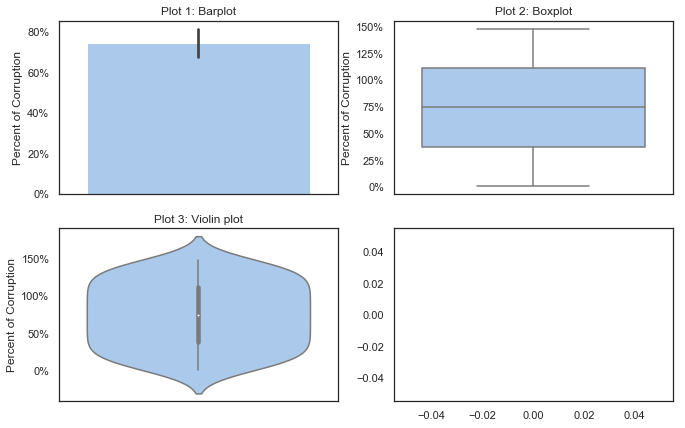

In [22]:
f, axes = plt.subplots(2, 2, figsize=(11, 7))
sns.set(style='white', palette='Set2')

g = sns.barplot(y='Corruption',data=report,palette="pastel", ax=axes[0,0])
g.set(xlabel='', ylabel='Percent of Corruption', title='Plot 1: Barplot')
g.yaxis.set_major_formatter(tick)

g = sns.boxplot(y='Corruption',data=report,palette="pastel", ax=axes[0,1])
g.set(xlabel='', ylabel='Percent of Corruption', title='Plot 2: Boxplot')
g.yaxis.set_major_formatter(tick)

g = sns.violinplot(y='Corruption',data=report,palette="pastel",ax=axes[1,0])
g.set(xlabel='', ylabel='Percent of Corruption', title='Plot 3: Violin plot')
g.yaxis.set_major_formatter(tick)

g = sns.distplot(report['Corruption'])  
plt.axvline(report['Corruption'].mean(), color="pastel", linestyle='dashed', linewidth=2)
g.set(xlabel='Percent of Corruption', ylabel='', title='Plot 4: Normalized histogram')
g.xaxis.set_major_formatter(tick)

plt.suptitle('Percent of Global Corruption', fontsize=14)
plt.setp(axes)

The barplot is a visualization of the distribution of global corruption. Although the plot shows the mean precentage of corruption among countries with a 95% confidence interval, the bar is not very insightful into determining the shape of the distribution. 

The boxplot provides more information about the dataset than plot 1. With the interquartile range, we can gain a better understanding of the distribution. There is a centeral tendency around the 75% mark and no outliers are apparent.

Similarly to the boxplot, the violin plot also displays information about the interquartile range. Plot 3 also shows the variance of the data so we can see how populated each range is. Since a violin plot is not often utilized in general practice, a nontechnical audence would not be able to read the plot. 

<will fill in once code works :)>

## Comparing Corruption and Social Support

We will plot the relationship between global corruption and soical support.

/Users/tsawaengsri/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


KeyError: 'Soical support'

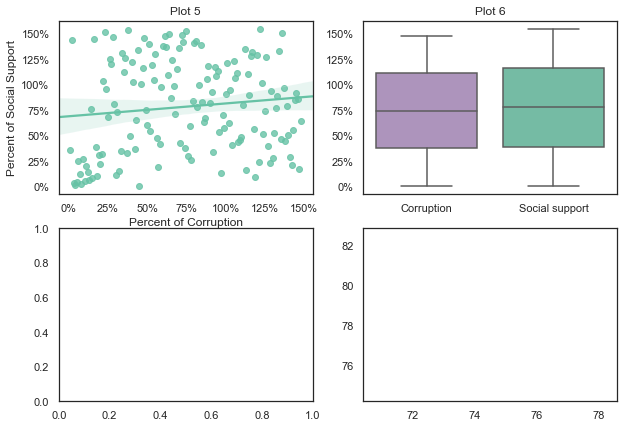

In [23]:
f, axes = plt.subplots(2, 2, figsize=(10, 7))

data = report[['Corruption','Social support']]

with sns.color_palette(['#af8dc3', '#69c7a8']):
    g = sns.regplot(x='Corruption', y='Social support', data=data, ax=axes[0,0])
    g.set(xlabel='Percent of Corruption', ylabel='Percent of Social Support', title='Plot 5')
    g.yaxis.set_major_formatter(tick)
    g.xaxis.set_major_formatter(tick)

    g = sns.boxplot(data=data, ax=axes[0,1])
    g.set(xlabel='', ylabel='', title='Plot 6')
    g.yaxis.set_major_formatter(tick)

    g = sns.distplot(report['Soical support'], color='#69c7a8', ax=axes[1,0])
    g = sns.distplot(report['Corruption'], color='#af8dc3', ax=g)
    g.xaxis.set_major_formatter(tick)
    g.set(xlabel='', ylabel='', title='Plot 7')

    plt.suptitle('Happiness Index: Corruption and Soical Support', fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.setp(axes)